# Introduction

[**Content**](#):
1. Load and Check Data
2. Variable Description
   - Univariate Variable Analysis  => Her bir değişkenin tek başına incelenmesi...
       - Categorical Variables
       - Numerical Variables
3. Basic Data Analysis
4. Outlier Detection
5. Missing Value
   - Find Missing Value
   - Fill Missing Value
6. Visualization
    - Correlation between Sibsp - Parch - Age - Fare - Survived
    - Sibsp -- Survived
    - PClass -- Survived
    - Age -- Survived
    - Pclass -- Survived -- Age
    - Embarked -- Sex -- Fare -- Survived
    - Fill Missing, Age Feature:
7. Feature Engineering
8. Modeling
   - Train Test Split
   - Simple Logistic Regression
   - Hyperparameter Tunning - Grid Search - Cross Validation
   - Prediction and Submission

In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

# Dosyaların tam yollarını almak için kullanılır
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load And Check Data

In [74]:
train_df = pd.read_csv("../data/train.csv")
# y_train = train_data["Survived"]

# X_test = pd.read_csv("/kaggle/input/titanic/titanic/test.csv")
# y_test = pd.read_csv("/kaggle/input/titanic/titanic/gender_submission.csv")

In [75]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Variable Description

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Univariate Variable Analysis

- Categorical: Survived, Pclass, Embarked, Cabin, SibSp, Parch, Name, Sex, Ticket
- Numeric Variables: Fare, age, PassengerId


### Categorical Variables

In [79]:
def bar_plot(variable):
    
    # get feature
    var = train_df[variable]
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(ticks=varValue.index, labels=varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print(f"{variable}: \n {varValue}")

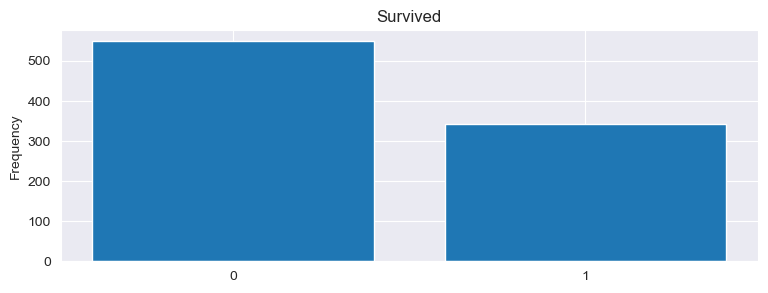

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


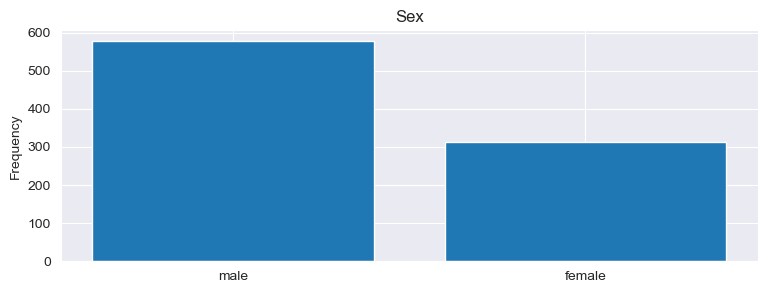

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


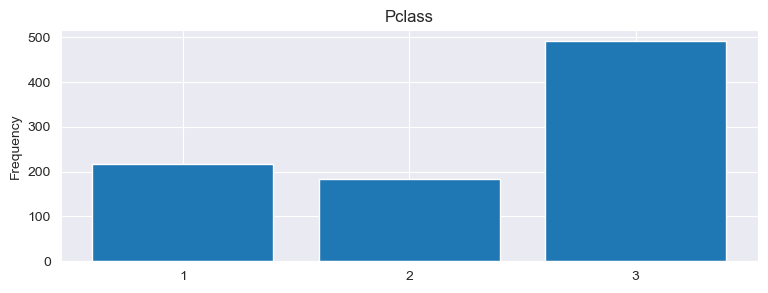

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


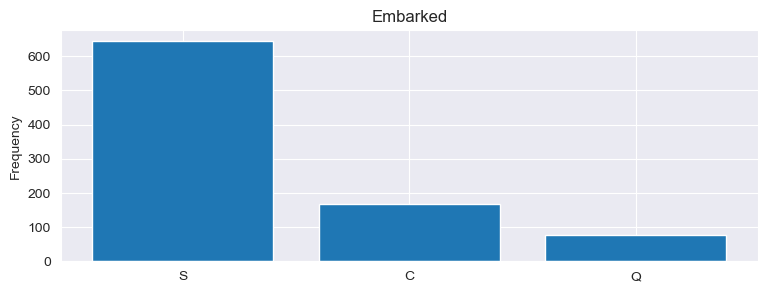

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


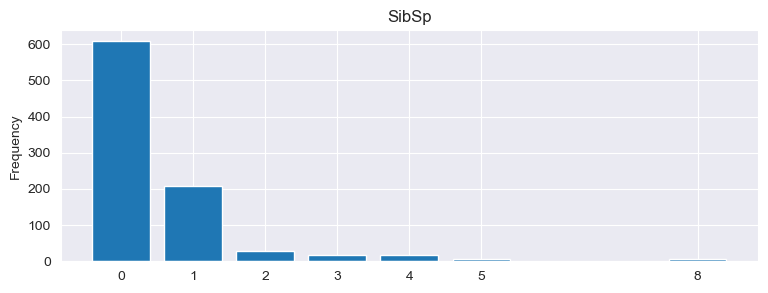

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


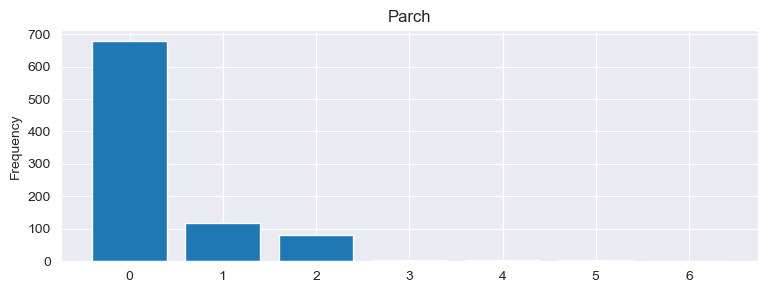

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [80]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [81]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print(f"{train_df[c].value_counts()}\n ")

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64
 
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
 
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
 


### Numerical Variable

In [82]:
def plot_hist(variable):

    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with hist")
    plt.show()

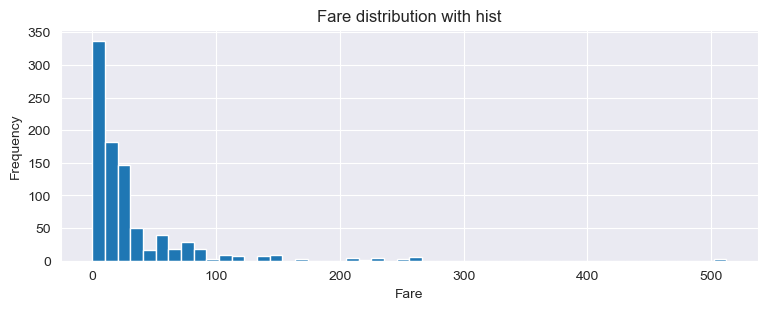

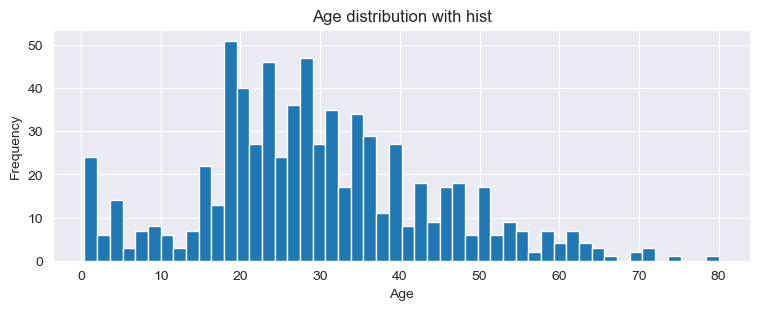

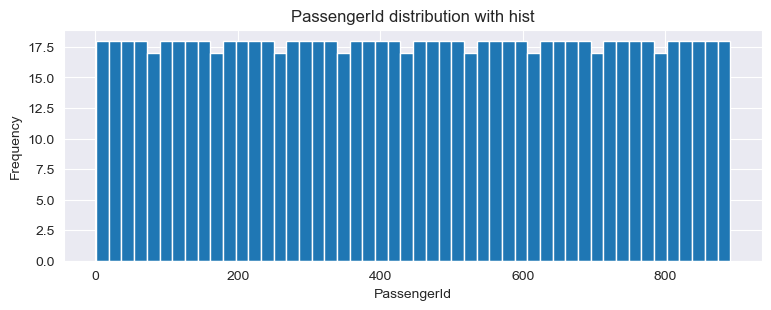

In [83]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic Data Analysis

In [84]:
# Pclass vs Survived
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [85]:
# Sex - Survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [86]:
# SibSp vs Survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [87]:
# Parch vs Survived
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Outlier Detection

In [88]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)

        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [89]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [90]:
# Drop Outliers
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]), axis=0).reset_index(drop=True)

# Missing Value

In [91]:
train_df_len = len(train_df)

## Find Missing Values

In [92]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [93]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

## Fill Missing Values
- Embarked has 2 missing value

In [94]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


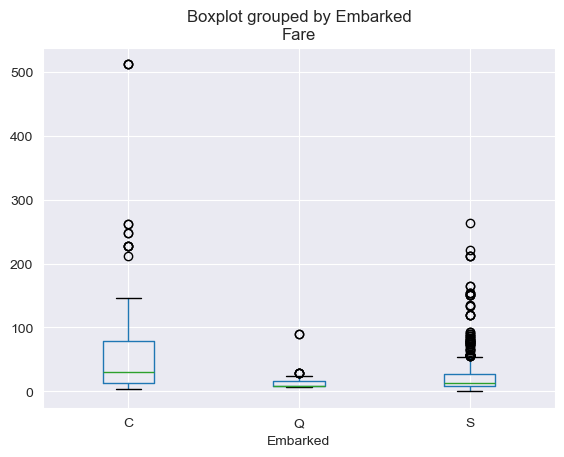

In [95]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [96]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Visualization

Featurelar arasındaki korelasyonu inceleme...

### Correlation Between SibSp - Parch - Age - Fare - Survived

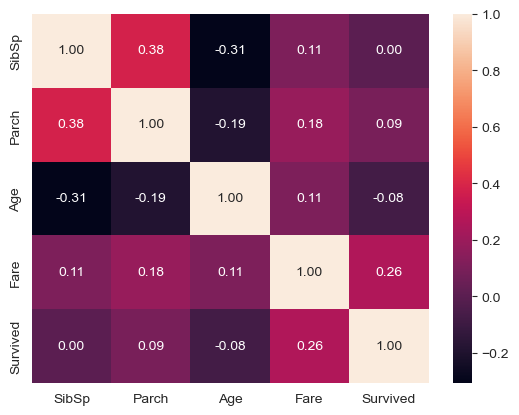

In [97]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

## Sibsp -- Survived

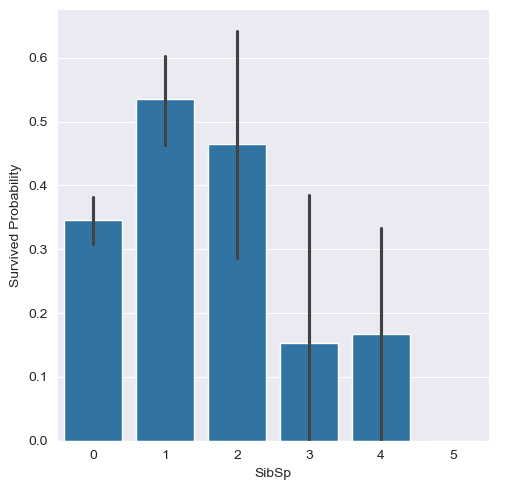

In [98]:
g = sns.catplot(x= "SibSp", y = "Survived", data= train_df, kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

## PClass -- Survived

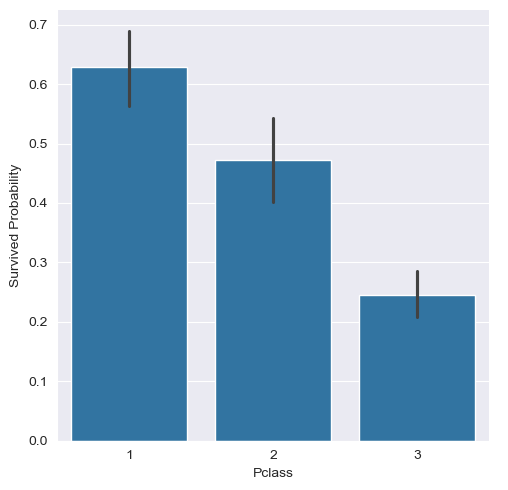

In [99]:
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survived Probability")
plt.show()

## Age -- Survived

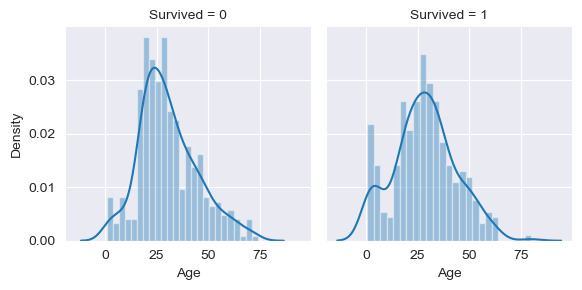

In [100]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

## Pclass -- Survived -- Age

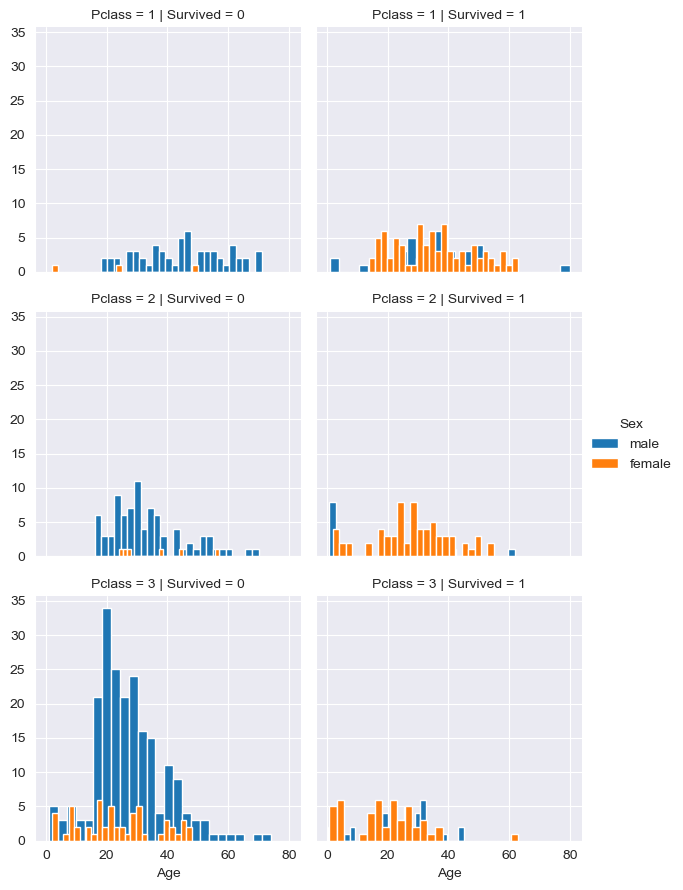

In [101]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", hue="Sex")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

## Embarked -- Sex -- Fare -- Survived

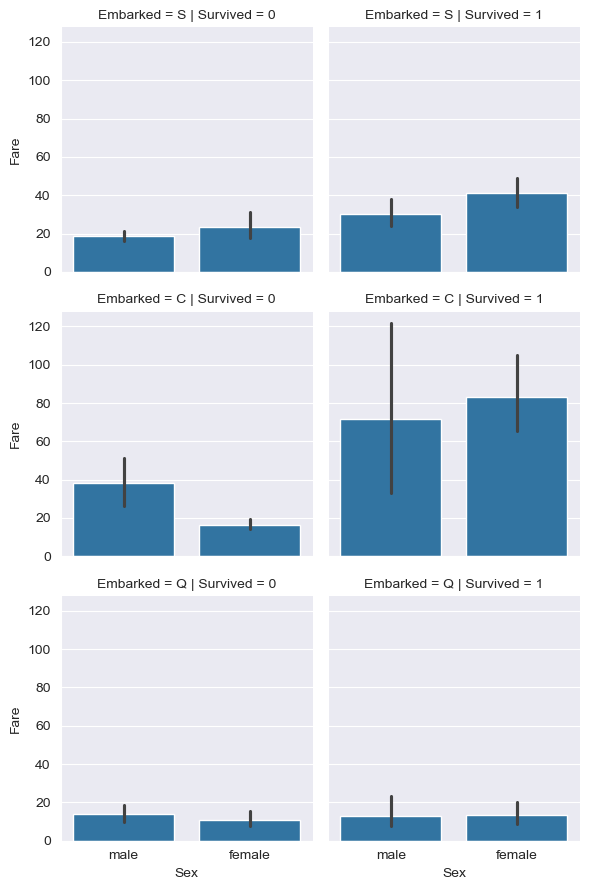

In [102]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")
plt.show()

## Fill Missing, Age Feature: 

In [103]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


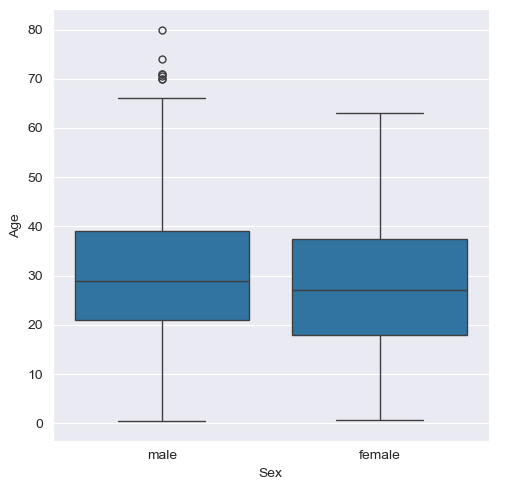

In [104]:
sns.catplot(x="Sex", y="Age",data=train_df, kind="box")
plt.show()

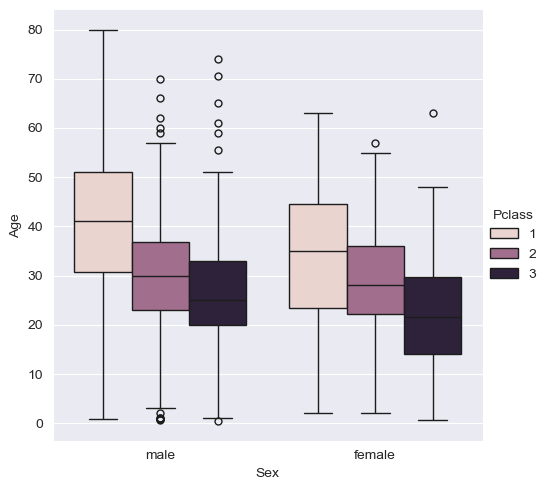

In [105]:
sns.catplot(x="Sex", y= "Age", hue="Pclass", data=train_df, kind="box")
plt.show()

In [106]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    # Yaşı kayıp olan kişi ile SibSp Parch ve Pclass değerleri aynı olan kişileri getir ve medyan değerini al.
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & 
                                (train_df["Parch"] == train_df.iloc[i]["Parch"]) & 
                                (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_median = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_median

In [107]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Feature Engineering

### Name -- Title

In [108]:
# Name'lere bakarak yeni bir feature çıkarımı yapabilir miyiz onu gözlemliyoruz. Mesela burada ünvanlara göre bir feature extraction yapabiliriz.
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [109]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

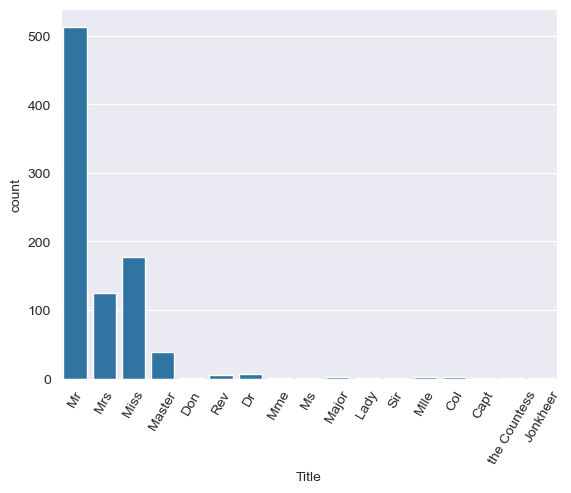

In [110]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

In [111]:
# Convert Categorical
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Jonkheer", "Capt", "Col", "Sir", "Lady", "Major", "Mme", "Dr", "Rev", "Don"], "other") # Kaldırılabilir...
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

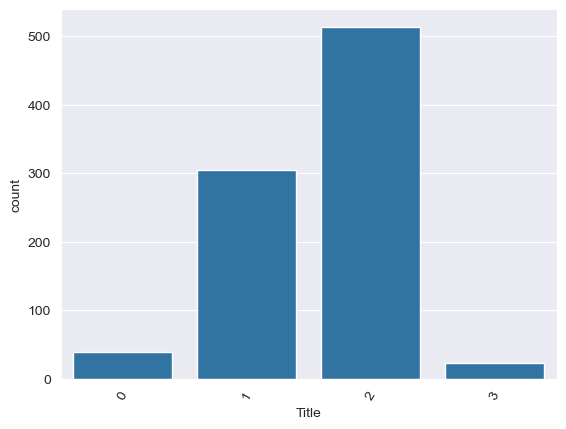

In [112]:
g = sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

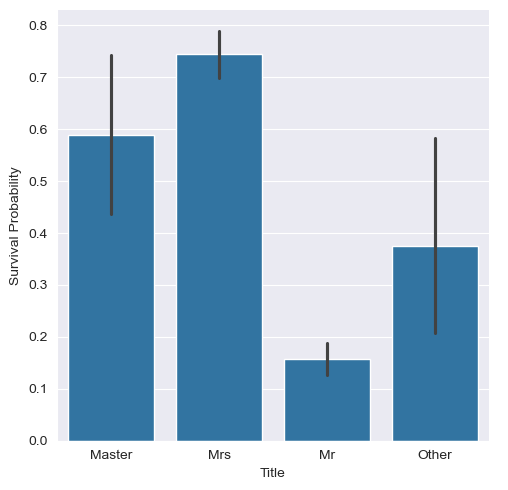

In [113]:
g = sns.catplot(x = "Title", y = "Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [114]:
train_df.drop(labels=["Name"], axis=1,inplace=True)

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    object 
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Ticket       881 non-null    object 
 8   Fare         881 non-null    float64
 9   Cabin        201 non-null    object 
 10  Embarked     881 non-null    object 
 11  Title        881 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 82.7+ KB


In [116]:
train_df = pd.get_dummies(train_df, columns=["Title"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


### Family Size

In [117]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    object 
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Ticket       881 non-null    object 
 8   Fare         881 non-null    float64
 9   Cabin        201 non-null    object 
 10  Embarked     881 non-null    object 
 11  Title_0      881 non-null    int32  
 12  Title_1      881 non-null    int32  
 13  Title_2      881 non-null    int32  
 14  Title_3      881 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(4)
memory usage: 89.6+ KB


In [118]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    object 
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Ticket       881 non-null    object 
 8   Fare         881 non-null    float64
 9   Cabin        201 non-null    object 
 10  Embarked     881 non-null    object 
 11  Title_0      881 non-null    int32  
 12  Title_1      881 non-null    int32  
 13  Title_2      881 non-null    int32  
 14  Title_3      881 non-null    int32  
 15  Fsize        881 non-null    int64  
dtypes: float64(2), int32(4), int64(6), object(4)
memory usage: 96.5+ KB


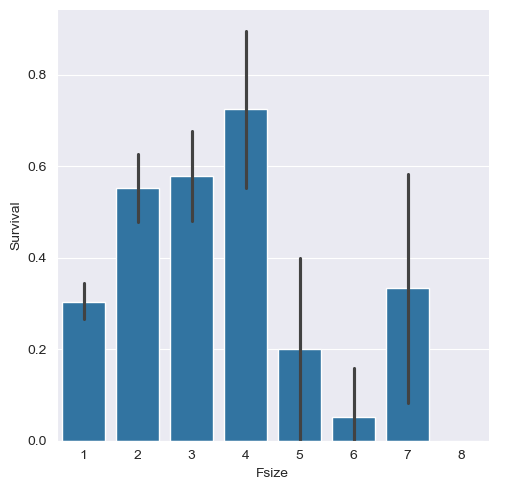

In [120]:
g = sns.catplot(x = "Fsize", y = "Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [121]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


In [122]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Sex          881 non-null    object 
 4   Age          881 non-null    float64
 5   SibSp        881 non-null    int64  
 6   Parch        881 non-null    int64  
 7   Ticket       881 non-null    object 
 8   Fare         881 non-null    float64
 9   Cabin        201 non-null    object 
 10  Embarked     881 non-null    object 
 11  Title_0      881 non-null    int32  
 12  Title_1      881 non-null    int32  
 13  Title_2      881 non-null    int32  
 14  Title_3      881 non-null    int32  
 15  Fsize        881 non-null    int64  
 16  family_size  881 non-null    int64  
dtypes: float64(2), int32(4), int64(7), object(4)
memory usage: 103.4+ KB


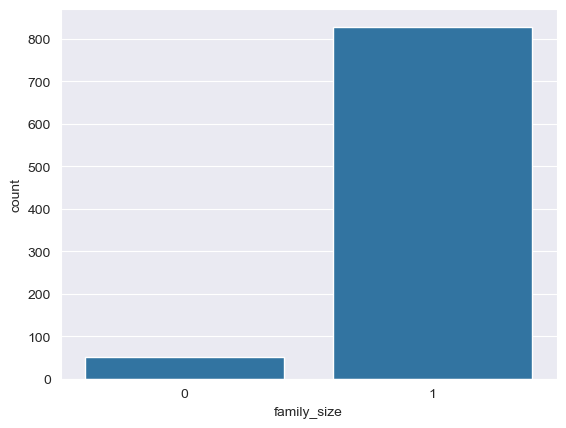

In [123]:
sns.countplot(x = "family_size", data=train_df)
plt.show()

In [124]:
train_df = pd.get_dummies(train_df, columns=["family_size"], dtype=int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    881 non-null    int64  
 1   Survived       881 non-null    int64  
 2   Pclass         881 non-null    int64  
 3   Sex            881 non-null    object 
 4   Age            881 non-null    float64
 5   SibSp          881 non-null    int64  
 6   Parch          881 non-null    int64  
 7   Ticket         881 non-null    object 
 8   Fare           881 non-null    float64
 9   Cabin          201 non-null    object 
 10  Embarked       881 non-null    object 
 11  Title_0        881 non-null    int32  
 12  Title_1        881 non-null    int32  
 13  Title_2        881 non-null    int32  
 14  Title_3        881 non-null    int32  
 15  Fsize          881 non-null    int64  
 16  family_size_0  881 non-null    int32  
 17  family_size_1  881 non-null    int32  
dtypes: float64

### Embarked

In [125]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

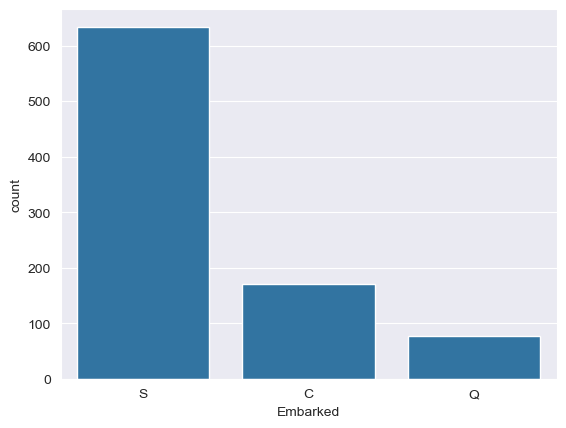

In [126]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [127]:
train_df = pd.get_dummies(train_df, columns=["Embarked"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    881 non-null    int64  
 1   Survived       881 non-null    int64  
 2   Pclass         881 non-null    int64  
 3   Sex            881 non-null    object 
 4   Age            881 non-null    float64
 5   SibSp          881 non-null    int64  
 6   Parch          881 non-null    int64  
 7   Ticket         881 non-null    object 
 8   Fare           881 non-null    float64
 9   Cabin          201 non-null    object 
 10  Title_0        881 non-null    int32  
 11  Title_1        881 non-null    int32  
 12  Title_2        881 non-null    int32  
 13  Title_3        881 non-null    int32  
 14  Fsize          881 non-null    int64  
 15  family_size_0  881 non-null    int32  
 16  family_size_1  881 non-null    int32  
 17  Embarked_C     881 non-null    int32  
 18  Embarked_Q

### PClass

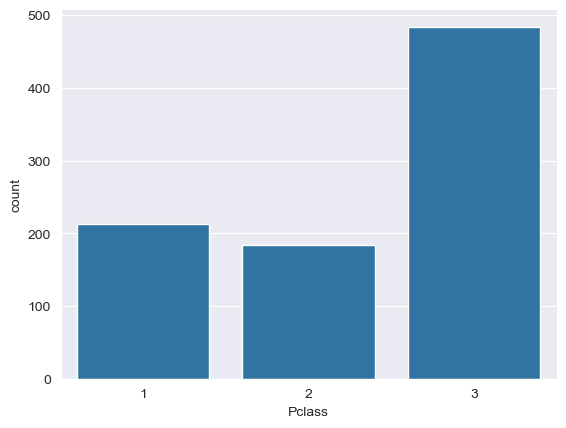

In [129]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [130]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"], dtype=int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,...,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,2,0,1,0,0,1,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,0,...,0,2,0,1,1,0,0,1,0,0
2,3,1,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,1,0,1,0,0,1,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,C123,0,...,0,2,0,1,0,0,1,1,0,0
4,5,0,male,35.0,0,0,373450,8.0500,NaN,0,...,0,1,0,1,0,0,1,0,0,1


### Sex

In [131]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"], dtype=int)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,...,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,...,0,1,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,C85,0,1,...,0,1,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,...,0,1,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,113803,53.1000,C123,0,1,...,0,1,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,373450,8.0500,NaN,0,0,...,0,1,0,0,1,0,0,1,0,1


In [132]:
# Cabin numarası olmayanları 0 ile dolduruyorum. Bu feature'ı da bir sınıf olarak kabul edeceğim.

train_df['Has_Cabin'] = np.where(train_df['Cabin'].notnull(), 1, 0)
#X_test['Has_Cabin'] = np.where(X_test['Cabin'].notnull(), 1, 0)

train_df.drop('Cabin', axis=1, inplace=True)
#X_test.drop('Cabin', axis=1, inplace=True)

train_df.info()
#X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    881 non-null    int64  
 1   Survived       881 non-null    int64  
 2   Age            881 non-null    float64
 3   SibSp          881 non-null    int64  
 4   Parch          881 non-null    int64  
 5   Ticket         881 non-null    object 
 6   Fare           881 non-null    float64
 7   Title_0        881 non-null    int32  
 8   Title_1        881 non-null    int32  
 9   Title_2        881 non-null    int32  
 10  Title_3        881 non-null    int32  
 11  Fsize          881 non-null    int64  
 12  family_size_0  881 non-null    int32  
 13  family_size_1  881 non-null    int32  
 14  Embarked_C     881 non-null    int32  
 15  Embarked_Q     881 non-null    int32  
 16  Embarked_S     881 non-null    int32  
 17  Pclass_1       881 non-null    int32  
 18  Pclass_2  

In [133]:
# Ticket ve PassengerId'in tamamen gereksiz featurelar olduğunu düşünüyorum. Bunları modele veri olarak vermyeceğim.
train_df.drop(labels=["Ticket", "PassengerId", "Fsize"], axis=1, inplace=True)

# Modeling

### KNN ile Model Eğitimi

In [134]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train Test Split

In [135]:
train = train_df.copy()

X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

print(f"X train: {len(X_train)}")
print(f"X test: {len(X_test)}")
print(f"Y train: {len(y_train)}")
print(f"Y test: {len(y_train)}")

X train: 590
X test: 291
Y train: 590
Y test: 590


## Simple Logistic Regression

In [136]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
acc_log_test = round(logreg.score(X_test, y_test)*100,2)

print(f"Train accuracy score: {acc_log_train}")
print(f"Test accuracy score: {acc_log_test}")

Train accuracy score: 82.54
Test accuracy score: 83.85


## HyperParameter Tuning -- Grid Search -- CrossValidation

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.
- Decision Tree
- SVM
- Random Forest
- KNN
- Logistic Regression

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 234 to 102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            590 non-null    float64
 1   SibSp          590 non-null    int64  
 2   Parch          590 non-null    int64  
 3   Fare           590 non-null    float64
 4   Title_0        590 non-null    int32  
 5   Title_1        590 non-null    int32  
 6   Title_2        590 non-null    int32  
 7   Title_3        590 non-null    int32  
 8   family_size_0  590 non-null    int32  
 9   family_size_1  590 non-null    int32  
 10  Embarked_C     590 non-null    int32  
 11  Embarked_Q     590 non-null    int32  
 12  Embarked_S     590 non-null    int32  
 13  Pclass_1       590 non-null    int32  
 14  Pclass_2       590 non-null    int32  
 15  Pclass_3       590 non-null    int32  
 16  Sex_female     590 non-null    int32  
 17  Sex_male       590 non-null    int32  
 18  Has_Cabin    

In [142]:
random_state = 42
classifiers = [DecisionTreeClassifier(random_state=random_state),
               SVC(random_state=random_state),
               RandomForestClassifier(random_state=random_state),
               LogisticRegression(random_state=random_state),
               KNeighborsClassifier()]


dt_param_grid = {"min_samples_split": range(10,100,5),
                 "max_depth": range(1, 20, 1)}

svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100, 200, 300, 1000]}

rf_param_grid = {"max_features": [2, 5, 8, 10, 12], # Rastgele Feature Bölümleme
                 "min_samples_split": [10, 25, 50],
                 "min_samples_leaf": [5, 20, 40],
                 "bootstrap": [True],
                 "n_estimators": [50, 100, 150, 200, 250, 300],
                 "criterion": ["gini"]}

logreg_param_grid = {"C": np.logspace(-3,3,7),
                     "penalty": ["l1", "l2"],
                     "solver": ["liblinear"]}

knn_param_grid = {"n_neighbors": np.linspace(1, 19, num=10, dtype=int).tolist(),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid]

In [143]:
cv_result = []
best_estimators = []
for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifier_param[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 342 candidates, totalling 3420 fits
0.8322033898305085
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7966101694915253
Fitting 10 folds for each of 270 candidates, totalling 2700 fits
0.8508474576271187
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8220338983050848
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7779661016949152


In [144]:
cv_results = pd.DataFrame({"Cross Validation Accuracy Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM", "RandomForestTree", "LogisticRegression", "KNN"]})
cv_results

,Cross Validation Accuracy Means,ML Models
0,0.832203,DecisionTreeClassifier
1,0.796610,SVM
2,0.850847,RandomForestTree
3,0.822034,LogisticRegression
4,0.777966,KNN


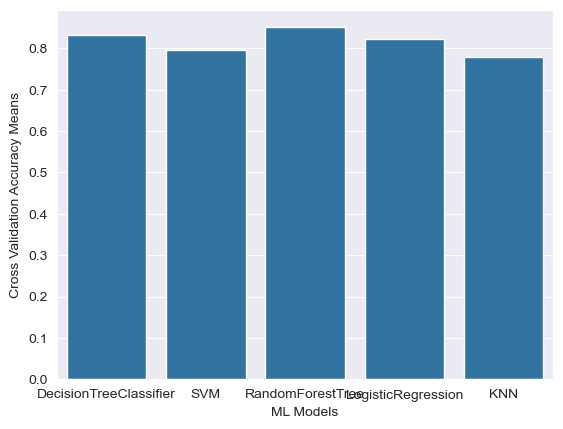

In [145]:
s = sns.barplot(cv_results, x="ML Models", y="Cross Validation Accuracy Means")

## Ensemble Modeling

In [146]:
# 3 farklı classifier'ın oylama yöntemi ile karar verilmesi...
votingC = VotingClassifier(estimators=[("dt", best_estimators[0]), ("rfc", best_estimators[2]), ("lr", best_estimators[3])], voting="soft", n_jobs=-1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8213058419243986
